# ARC tests sets functions

In [49]:
# env PYTHONPATH=/home/sjeffery/Documents/arc/ARC/src/

In [87]:
%matplotlib inline
import sys
import os

# imports from other file.
import json
import numpy as np
import re

import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.insert(0, '/home/sjeffery/Documents/arc/ARC/src')
print (sys.path)
import manual_solve as arc

['/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/Documents/arc/ARC/src', '/home/sjeffery/anaconda3/lib/python37.zip', '/home/sjeffery/anaconda3/lib/python3.7', '/home/sjeffery/anaconda3/lib/python3.7/lib-dynload', '', '/home/sjeffery/anaconda3/lib/python3.7/site-packages', '/home/sjeffery/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/sjeffery/.ipython']


In [51]:
# !ln -s /sjeffery/Documents/arc/ARC/src/manual_solve.py manual_solve.py

In [52]:
def read_arc(data):
    # Extract the train/test input/output grids. Each grid will be a
    # list of lists of ints. We convert to Numpy.
    train_input = [np.array(data['train'][i]['input']) for i in range(len(data['train']))]
    train_output = [np.array(data['train'][i]['output']) for i in range(len(data['train']))]
    test_input = [np.array(data['test'][i]['input']) for i in range(len(data['test']))]
    test_output = [np.array(data['test'][i]['output']) for i in range(len(data['test']))]

    return (train_input, train_output, test_input, test_output)

In [53]:
PATH = r'/home/sjeffery/Documents/arc/ARC/data/training/'
%cd /home/sjeffery/Documents/arc/ARC/data/training/
arc_file = '9d9215db.json'

/home/sjeffery/Documents/arc/ARC/data/training


In [54]:
ID = '9d9215db'
# directory = os.path.join("..", "data", "training")
json_filename = os.path.join(PATH, ID + ".json")
data = arc.read_ARC_JSON(json_filename)

train_input, train_output, test_input, test_output = data

## Stop here if running the main section.

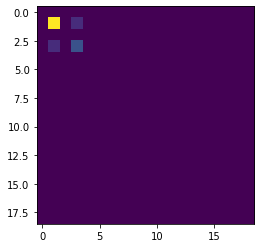

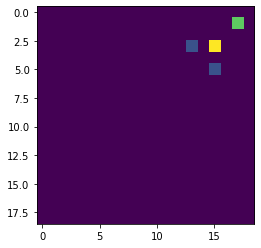

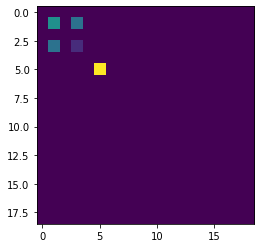

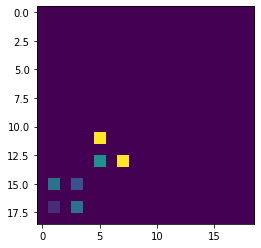

In [55]:
def plot_array (A):
    for t_ in range (len(A)):
        plt.figure(t_)
        plt.imshow(A[t_])
        
plot_array (train_input)

plt.figure()
plt.imshow(test_input[0])

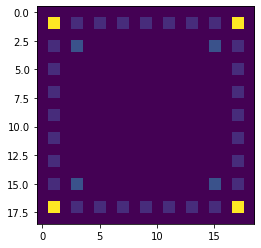

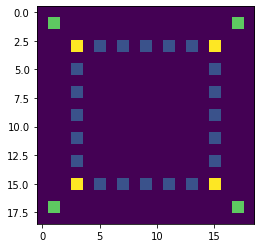

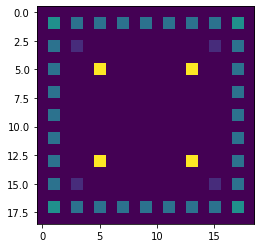

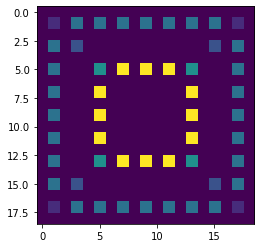

In [56]:
plot_array(train_output)

plt.figure()
plt.imshow(test_output[0])

## Run the above code for importing the grids.

In [57]:
# Here we select the grid we are going to complete the transformations on, train_input [i] for i in domain [0,2]
# As we're building multipurpose functions selcting zero here generally OK.
test_me = np.array([[1,2,0], [3,0,0], [0,0,4]]) # make a small array for testing.

def rows_cols (A):
    rows, cols = A.shape[0], A.shape[0]
    return rows, cols

rows_cols (train_input[0])

(19, 19)

In [68]:
test_input[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0,

In [276]:
# Every array has a number of pixels often grouped into a shape and with colors.
# Here we  only have one shape in the training image to find.
# we want the coordinates of all the non-zero pixels.

def get_coords (A):
    """ 
    takes the array with a grid of color values.
    get coordinates(x, y), with (0,0) in top left of arrary as (row, col)
    returns array of (r,c) points and array of (x,y, color) points where color is a integer from 0 to 9.
    """
    rc_coords = np.flip(np.column_stack(np.where(A > 0)), axis = 1) # the array of points (r,c)
    rows, cols = rows_cols (A) # get size of the main training area
    
    n_points = rc_coords.shape[0]  # number of non zero points
    points = np.zeros((n_points, 3)) # new array to hold the tranformed points in x,y,color format
    
    for p in range(n_points):
        points[p][0] = rc_coords[p][1]  # x = col
        points[p][1] = rows -1 - rc_coords[p][0] # y = nrows - 1 - row
        points[p][2] = A[rc_coords[p][1], rc_coords[p][0]] # the color value at (x,y) = (c,r)
        # print (f' {p}, ({rc_coords[p][0]}, {rc_coords[p][1]}, {A[rc_coords[p][1], rc_coords[p][0]]} )')
        
    return (rc_coords, points)

rc_coords, points = get_coords (train_input[0])
rc_coords, points

(array([[1, 1],
        [3, 1],
        [1, 3],
        [3, 3]]),
 array([[ 1., 17.,  8.],
        [ 1., 15.,  1.],
        [ 3., 17.,  1.],
        [ 3., 15.,  2.]]))

In [277]:
get_coords (test_me)

(array([[0, 0],
        [1, 0],
        [0, 1],
        [2, 2]]),
 array([[0., 2., 1.],
        [0., 1., 2.],
        [1., 2., 3.],
        [2., 0., 4.]]))

In [278]:
# We want to transform these to a new coordinate axis with a new origin at the centre of the grid.
# these are all 19 x 19 grids, so point (9,9)

In [279]:
# We want to transform these to a new coordinate axis with a new origin at the centre of the grid.
# these are all 19 x 19 grids, so point (9,9)

import copy
def translate (p, tx, ty):
    """
    Translate takes a single point in  x,y coordinates and translates them via the vector (tx, ty, 1) so that the (x,y, color) points move to
    (x + tx), (y + ty), negative numbrs for tx and ty are allowed. We can use this to move to a new coordinate system.
    transform is the tranformation matrix for translation, so that we complete the Affine transformation with matrix multiplication.
    """
    pxy = copy.deepcopy (p[0:2]) # just the x,y points
    color = p[2] # just the color
        
    pxy.resize((3,)) # points always size (3,)
    pxy[2] = 1 # add on a dummy 1 on the end
    
    transform = np.eye(3)
    transform [0,2], transform [1,2] = (tx, ty)
        
    tp = np.matmul(transform, pxy)
    tp [2] = color # add the color back in
    
    return tp

print (points[0])
tp = translate (points[0], -9 , -9)
tp

[ 1. 17.  8.]


array([-8.,  8.,  8.])

In [280]:
type(points), points.shape[0], np.zeros((4,3))

(numpy.ndarray,
 4,
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [281]:
# add a column at column index m, where m is <= cols
def add_col(A, m):
    """
    Adds a column of zeros at mth column where 0 <= m <= cols
    If we got an array with an even number of cols then we've need to add a column to 
    become the axis column to transform around.
    """
    # get info on array A shape.
    rows, cols = rows_cols(A)
    
    # create the column array we want to add of zeros.
    new = np.ones(rows)
    new.resize(rows,1)
    
    # first case if m = cols
    if m == cols:
        B = np.hstack((A, new))
        return B
    
    # if the we want to add to teh middle of the array at col m
    A_left = A[:, 0:m]
    A_right = A[:, m:]
    #print (A_left)
    #print (A_right)
    B = np.hstack((A_left, new, A_right))
    
    return B

B = add_col(train_input[0],9)
# B

In [282]:
train_input[0].shape

(19, 19)

In [283]:
train_input[0][0,18]

0

In [284]:
def reflect (p, axis = 1, inplace = False):
    """
    The reflect function takes a single point in  x,y coordinates and translates them via the transformation matrix [[-1, 0, 0], [0, 1, 0], [0, 0, 1]]
    so that the (x,y) points move to a new point reflected about the y-axis when axis = 1, and the x-ais reflection when axis = -1
    We can use this to move to a new coordinate system. transform is the tranformation matrix for this translation, 
    so that we complete the Affine transformation with matrix multiplication.
    If Inplace = Trure, we return two points the point tp the reflected point and point p the original.
    
    >>> reflect (np.array([-8.,  8., 1.]), axis = 1)
    array([8., 8., 1.])
    
    >>> reflect (np.array([-8.,  8.,  1.]), axis = -1)
    array([-8., -8.,  1.])
    
    >>> reflect (np.array([-8.,  6.,  5]), axis = -1, inplace = True)
    array([[-8., -6.,  5.],
           [-8.,  6.,  5.]])
    
    """
    pxy = copy.deepcopy (p)
    pxy.resize((3,)) # points always size (3,)
    # pxy[2] = 1 # add on a dummy 1 on the end
    
    # make the transform function, new point = T*p
    transform = np.eye(3)
    transform [0,0] = -1
    
    if axis == 1:
        transform *= axis
    else:
        transform *= np.array([axis, axis, 1])
    # print (f'Transform = {transform}')
    
    tp = np.matmul(transform, pxy)
    
    if inplace:
        tp = np.vstack((tp, p))
    
    return tp

tp = reflect (trans_pts[0], axis = 1, inplace = True)
tp

print (f'Trans_Point (on new axis) = {trans_pts[0]}')

Trans_Point (on new axis) = [2. 4. 8.]


<p> Test checks on the function for docstring testing.

In [285]:
reflect (np.array([-8,  8,  1]), axis = -1)

array([-8., -8.,  1.])

In [286]:
reflect (np.array([-8.,  6.,  5]), axis = -1, inplace = True)

array([[-8., -6.,  5.],
       [-8.,  6.,  5.]])

In [287]:
# Look in an array of points (the reflected points) and select all points of the most common color.
# this should return a set of 8 points.
points

array([[ 1., 17.,  8.],
       [ 1., 15.,  1.],
       [ 3., 17.,  1.],
       [ 3., 15.,  2.]])

In [314]:
def common_color (points, color = False):
    """
    Inputs are the point array, of transformed or raw points, of the form (x,y,color) or (r,c,color) and returns
    A, the most common color and B, the point of that color.
    
    >>> p = np.int_([[ 1, 17,  8], [ 1, 15,  1], [ 3, 17,  1], [ 3, 15,  2]])
    >>> n, a, b = common_color(p)
    >>> print (n,a,b)
    1 [1] [array([[ 1, 15,  1],
       [ 3, 17,  1]])]
    
    """
    # get any pairs of colors in the list
    colors = [color for (_,_,color) in points]
    color_pairs = [int(c1) for (c1,c2) in list(combinations(colors,2)) if (c1 == c2)]
    B = [points[points[:,2] == A] for A in color_pairs]
    n_common_color = len(color_pairs)
              
    return n_common_color, color_pairs, B

print (points)
n_common_color, color_pairs, color_points = common_color (points);
print (n_common_color,color_pairs, color_points)

[[ 1. 17.  8.]
 [ 1. 15.  1.]
 [ 3. 17.  1.]
 [ 3. 15.  2.]]
1 [1] [array([[ 1., 15.,  1.],
       [ 3., 17.,  1.]])]


In [315]:
# for doctest testing
p = np.int_([[ 1, 17,  8], [ 1, 15,  1], [ 3, 17,  1], [ 3, 15,  2]])
n, a, b = common_color(p)
print (n,a,b)

1 [1] [array([[ 1, 15,  1],
       [ 3, 17,  1]])]


In [289]:
# test code for getting pairs of points.
colors = [color for (_,_,color) in points]
color_pairs = [int(c1) for (c1,c2) in list(combinations(colors,2)) if (c1 == c2)]
color_pairs

[1]

In [290]:
# select most left pair of points, join them with alternate same color points.
# loop from one point to other with step until arrive at other point.

In [291]:
def select_color_pairs (A):
    """
    Given the array 
    """
    pass
    

In [292]:
# apply a mask to the array to get the color points the match the color_pairs colors.
edge_points = [points[points[:,2]==color, :] for color in color_pairs]
edge_points

[array([[ 1., 15.,  1.],
        [ 3., 17.,  1.]])]

In [293]:
def select_pairs (A):
    """
    points is the list of points to select from, is an array of (n x 3) shape with n points of (x, y, color)
    the function is how we select the points, min(x), max (x), min(y), max(y)
    potentially sort and select top two.
    return a pair of points. point_pairs
    
    """
       
    # sort the x values and take the min and max pairs from the sorted list.
    Ax = A[A[:,0].argsort()]
    # max x values
    min_x_pair, max_x_pair = Ax[:2], Ax[-2:]
    
    # sort the y values and take the min and max pairs from the sorted list.
    Ay = A[A[:,1].argsort()]
    min_y_pair, max_y_pair = Ay[:2], Ay[-2:]
    
    if not (min_x_pair[0][0] == min_x_pair[1][0]) and (max_x_pair[0][0] == max_x_pair[1][0]):
        raise ValueError ('The x values in the provided points do not have a shared max/min x value pair')
    
    if not (min_y_pair[0][1] == min_y_pair[1][1]) and (max_y_pair[0][1] == max_y_pair[1][1]):
        raise ValueError ('The y values in the provided points do not have a shared max/min y value pair')
    
    return max_x_pair, min_x_pair, max_y_pair, min_y_pair

select_pairs (edge_points[0])

(array([[ 1., 15.,  1.],
        [ 3., 17.,  1.]]),
 array([[ 1., 15.,  1.],
        [ 3., 17.,  1.]]),
 array([[ 1., 15.,  1.],
        [ 3., 17.,  1.]]),
 array([[ 1., 15.,  1.],
        [ 3., 17.,  1.]]))

In [294]:
def flatten(t):
    return [item for sublist in t for item in sublist]

def join_pairs( p1, p2, step, color = -1):
    """ Color = -1 uses the color of the points returns an error if points are not the same color.
    otherwise color is a value beween 0[0,9]
    p (x,y,color), step = 1 colors every points, step = 2 every other point.
    mod (p1 - p2 / steps) == 0 as there must be a whole number of steps to get to the new point.
    """
    # print (p1,p2)
    max_x = max(p1[0], p2[0])
    min_x = min(p1[0], p2[0])
    max_y = max(p1[1], p2[1])
    min_y = min(p1[1], p2[1])
    
    if color == -1:
        color = p1[2]
    
    points = [] # initiate for new points [x, y, color]
    
    # print (max_x, min_x, max_y, min_y)
    
    if (max_x == min_x):  # then we want to tranverse this x value from ymin to ymax with color p1[3] and step
        
        if (max_y- min_y) % step == 0:
            N = int((max_y- min_y) / step)
        else:
            raise ValueError (f'You can\'t fill with that step {step} between between {min_y} and {max_y},please select a new step value.')
        
        ys = list(np.linspace(min_y, max_y,N+1))
        print (f' y= {ys}')
        new_points = [[min_x, y, p1[2]] for y in ys]
        points.append(new_points)
        
    elif (max_y == min_y):  # then we want to tranverse this x value from ymin to ymax with color p1[3] and step
        
        if (max_x- min_x) % step == 0:
            N = int((max_x- min_x) / step)
        else:
            raise ValueError (f'You can\'t fill with that step {step} between between {min_x} and {max_x},please select a new step value.')
        
        xs = list(np.linspace(min_x, max_x,N+1))
        print (f' x= {xs}')
        new_points = [[x, min_y, p1[2]] for x in xs]
        points.append(new_points)
    
    else:
        raise valueError ('The points do not form a vert of horizontal line so can not be filled.')
    
    return points

joins = [(max_x_pair[0], max_x_pair[1], 2), (min_x_pair[0], min_x_pair[1], 2),
         (max_y_pair[0], max_y_pair[1], 2), (min_y_pair[0], min_y_pair[1], 2)]

jp = [flatten(join_pairs (*join)) for join in joins]
jp = np.array (flatten (jp))
jp

 y= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 y= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 x= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 x= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]


array([[ 8., -6.,  3.],
       [ 8., -4.,  3.],
       [ 8., -2.,  3.],
       [ 8.,  0.,  3.],
       [ 8.,  2.,  3.],
       [ 8.,  4.,  3.],
       [ 8.,  6.,  3.],
       [-8., -6.,  3.],
       [-8., -4.,  3.],
       [-8., -2.,  3.],
       [-8.,  0.,  3.],
       [-8.,  2.,  3.],
       [-8.,  4.,  3.],
       [-8.,  6.,  3.],
       [-6.,  8.,  3.],
       [-4.,  8.,  3.],
       [-2.,  8.,  3.],
       [ 0.,  8.,  3.],
       [ 2.,  8.,  3.],
       [ 4.,  8.,  3.],
       [ 6.,  8.,  3.],
       [-6., -8.,  3.],
       [-4., -8.,  3.],
       [-2., -8.,  3.],
       [ 0., -8.,  3.],
       [ 2., -8.,  3.],
       [ 4., -8.,  3.],
       [ 6., -8.,  3.]])

In [295]:
(max_y_pair[0], max_y_pair[1])

(array([6., 8., 3.]), array([-6.,  8.,  3.]))

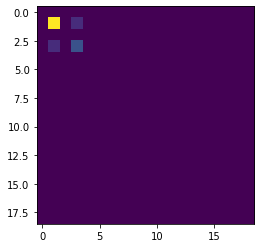

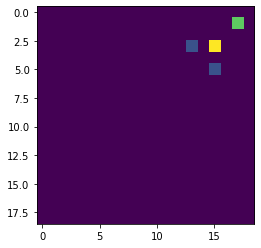

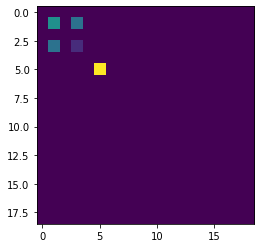

In [296]:
plot_array (train_input)

## Main ()

In [297]:
from itertools import combinations

In [299]:
rc_coords, points = get_coords (train_input[0])  # possible inputs are 0, 1, 2
rc_coords, point

(array([[1, 1],
        [3, 1],
        [1, 3],
        [3, 3]]),
 array([-8.,  6.,  3.]))

In [300]:
# Take all the points with none zero color and translate their coordinates. These are the points with reference to a 
# new origin at (tx, ty) so that this is now (0, 0)

trans_pts = np.zeros((points.shape[0],3)) # make the zeros matrix for transformed points.

# iterate over the matrix rows of points transforming each point to the new origin
for idx, point in enumerate(points):
    # print (idx, point)
    trans_pts[idx] = translate(point, -9, -9)
trans_pts

print (points)
print (trans_pts)

[[ 1. 17.  8.]
 [ 1. 15.  1.]
 [ 3. 17.  1.]
 [ 3. 15.  2.]]
[[-8.  8.  8.]
 [-8.  6.  1.]
 [-6.  8.  1.]
 [-6.  6.  2.]]


In [301]:
# reflect the these points about the x and then the y axis about the new origin

reflect_pts = np.zeros((trans_pts.shape[0]*4,3)) # make the zeros matrix for transformed points. 4 x poits after double reflection.

for idx, point in enumerate(trans_pts):
    # print (idx, point)
    reflect_pts[idx] = point
    reflect_pts[idx+trans_pts.shape[0]] = reflect (point, axis = 1, inplace = False) # reflect across y axis
    # print (point)
    # print (reflect_pts[idx+trans_pts.shape[0]])
    # print ()
    # reflect_pts[idx] = tp[0]
    # reflect_pts [idx+1] = tp[1]


for idx, point in enumerate(reflect_pts[0:reflect_pts.shape[0]//2]):
    #print (idx)
    reflect_pts[idx+reflect_pts.shape[0]//2] = reflect (point, axis = -1, inplace = False)  # reflect across x ais
    # print (idx, point, reflect_pts[idx+8])

reflect_pts
    


array([[-8.,  8.,  8.],
       [-8.,  6.,  1.],
       [-6.,  8.,  1.],
       [-6.,  6.,  2.],
       [ 8.,  8.,  8.],
       [ 8.,  6.,  1.],
       [ 6.,  8.,  1.],
       [ 6.,  6.,  2.],
       [-8., -8.,  8.],
       [-8., -6.,  1.],
       [-6., -8.,  1.],
       [-6., -6.,  2.],
       [ 8., -8.,  8.],
       [ 8., -6.,  1.],
       [ 6., -8.,  1.],
       [ 6., -6.,  2.]])

In [302]:
# get the points with a common color
n_common_colors, color_pairs, color_points = common_color (points);
edge_points = [reflect_pts[reflect_pts[:,2]==color, :] for color in color_pairs]
# color_pairs, edge_points

# get the pairs of points that are at the edge of the grid that we want to join.
# we should do this for a loop of edge_points, in range(n_common_points)
join_pts = []
for edge in range(n_common_colors):
    max_x_pair, min_x_pair, max_y_pair, min_y_pair = select_pairs (edge_points[edge])
    print (n_common_colors, edge, max_x_pair, min_x_pair, max_y_pair, min_y_pair)
    # call join points here to join all the pairs
    joins = [(max_x_pair[0], max_x_pair[1], 2), (min_x_pair[0], min_x_pair[1], 2),
             (max_y_pair[0], max_y_pair[1], 2), (min_y_pair[0], min_y_pair[1], 2)]
    jp = [flatten(join_pairs (*join)) for join in joins]
    join_pts.append(np.array (flatten (jp)))
    # join_pts, list of arrays of points for each color to stack

join_pts

1 0 [[ 8.  6.  1.]
 [ 8. -6.  1.]] [[-8.  6.  1.]
 [-8. -6.  1.]] [[-6.  8.  1.]
 [ 6.  8.  1.]] [[-6. -8.  1.]
 [ 6. -8.  1.]]
 y= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 y= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 x= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]
 x= [-6.0, -4.0, -2.0, 0.0, 2.0, 4.0, 6.0]


[array([[ 8., -6.,  1.],
        [ 8., -4.,  1.],
        [ 8., -2.,  1.],
        [ 8.,  0.,  1.],
        [ 8.,  2.,  1.],
        [ 8.,  4.,  1.],
        [ 8.,  6.,  1.],
        [-8., -6.,  1.],
        [-8., -4.,  1.],
        [-8., -2.,  1.],
        [-8.,  0.,  1.],
        [-8.,  2.,  1.],
        [-8.,  4.,  1.],
        [-8.,  6.,  1.],
        [-6.,  8.,  1.],
        [-4.,  8.,  1.],
        [-2.,  8.,  1.],
        [ 0.,  8.,  1.],
        [ 2.,  8.,  1.],
        [ 4.,  8.,  1.],
        [ 6.,  8.,  1.],
        [-6., -8.,  1.],
        [-4., -8.,  1.],
        [-2., -8.,  1.],
        [ 0., -8.,  1.],
        [ 2., -8.,  1.],
        [ 4., -8.,  1.],
        [ 6., -8.,  1.]])]

In [303]:
reflect_pts.shape, [join_pts[i].shape for i in range (len(join_pts))]

((16, 3), [(28, 3)])

In [304]:
# make the array of all the points with hstack
all_trans_pts =  copy.deepcopy(reflect_pts)

for pts in range(len(join_pts)):
    all_trans_pts =  np.vstack((all_trans_pts, join_pts[pts]))

    all_trans_pts

In [305]:
all_trans_pts.shape

(44, 3)

In [306]:
# transform the array back to the matrix coordinate system

# create the empty array the same size as all the points.
all_pts = np.zeros_like(all_trans_pts).astype(int)

# translate the coordinate positions back to the orgin in the bottom left of the array.
for idx, row in enumerate (all_trans_pts):
    all_pts[idx] = translate (row, 9 , 9)

print (all_pts)
    
# open a blank final grid
final_grid = np.zeros((19,19))

# for each point, populate the array with the color given (x,y,color) to (r,c, color)
for row in all_pts:
    final_grid [row[1], final_grid.shape[1] -1 - row[0]] = row[2]

final_grid = final_grid.reshape((19,19))
final_grid.shape

[[ 1 17  8]
 [ 1 15  1]
 [ 3 17  1]
 [ 3 15  2]
 [17 17  8]
 [17 15  1]
 [15 17  1]
 [15 15  2]
 [ 1  1  8]
 [ 1  3  1]
 [ 3  1  1]
 [ 3  3  2]
 [17  1  8]
 [17  3  1]
 [15  1  1]
 [15  3  2]
 [17  3  1]
 [17  5  1]
 [17  7  1]
 [17  9  1]
 [17 11  1]
 [17 13  1]
 [17 15  1]
 [ 1  3  1]
 [ 1  5  1]
 [ 1  7  1]
 [ 1  9  1]
 [ 1 11  1]
 [ 1 13  1]
 [ 1 15  1]
 [ 3 17  1]
 [ 5 17  1]
 [ 7 17  1]
 [ 9 17  1]
 [11 17  1]
 [13 17  1]
 [15 17  1]
 [ 3  1  1]
 [ 5  1  1]
 [ 7  1  1]
 [ 9  1  1]
 [11  1  1]
 [13  1  1]
 [15  1  1]]


(19, 19)

In [307]:
final_grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 8., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 8., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

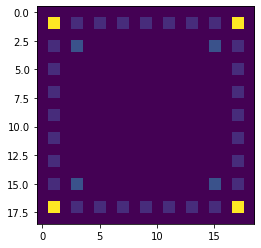

In [308]:
# check the plot with imshow

plt.figure()
plt.imshow(final_grid)

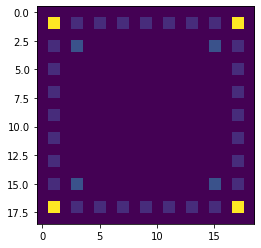

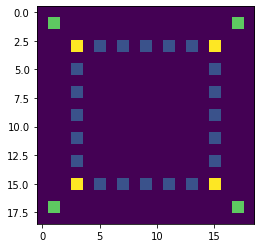

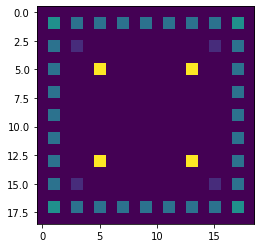

In [309]:
plot_array(train_output)

In [310]:
import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 7, in __main__.common_color
Failed example:
    a,b = common_color (p);
Exception raised:
    Traceback (most recent call last):
      File "/home/sjeffery/anaconda3/lib/python3.7/doctest.py", line 1329, in __run
        compileflags, 1), test.globs)
      File "<doctest __main__.common_color[1]>", line 1, in <module>
        a,b = common_color (p);
    ValueError: too many values to unpack (expected 2)
**********************************************************************
File "__main__", line 8, in __main__.common_color
Failed example:
    print (a, b)
Expected:
    1 [[ 1 15  1]
     [ 3 17  1]]
Got:
    3 [array([[11., 13.,  8.],
           [13., 11.,  8.]]), array([[15., 17.,  3.],
           [17., 15.,  3.]])]
**********************************************************************
1 items had failures:
   2 of   3 in __main__.common_color
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=6)

# The function 

In [324]:
x = train_input[0]

In [325]:
def solve_9d9215db(x):
    """
    The initial grid consists of four pixels in one quarter of the grid. Two of these pixels
    are the same colour. The four pixels are reflected in teh x and y axis with the origin at the
    centre of the grid. The two points of the same colour are joined by alternating pixels of the
    same colour to form an inner square.
    
    This program uses numpy operations to complete the affine transformations to give the target shape.
    Stephen Jeffery 21249306, Nov 2021
    
    """
    ## Main imports
    from itertools import combinations
    
    # imports from other file to allow testing in jupyterlab.
    import json
    import numpy as np
    import re
    
    import copy
    import numpy as np
    import matplotlib.pyplot as plt

    test_me = np.array([[1,2,0], [3,0,0], [0,0,4]]) # make a small array for testing.
    
    def rows_cols (A):
        """
        Get the size of the initial array A and return number of rows and coloums.
        
        >>> test_me = np.array([[1,2,0], [3,0,0], [0,0,4]]) # make a small array for testing.
        >>> rows_cols (test_me)
        (3, 3)
                
        """
        rows, cols = A.shape[0], A.shape[0]
        return rows, cols


    
    # Every array has a number of pixels often grouped into a shape and with colors.
    # Here we only have one shape in the training image to find. We will treat these
    # as individual points rather than shapes as all points get the same transformations.
    # we want the coordinates of all the non-zero pixels.

    def get_coords (A):
        """ 
        takes the array A with a grid of color values.
        get coordinates(x, y), with (0,0) in top left of arrary as (row, col)
        returns array of (r,c) points and array of (x,y, color) points where color is a integer from 0 to 9.
        
        get_coords (test_me)
        (array([[0, 0],
        [1, 0],
        [0, 1],
        [2, 2]]),
 array([[0., 2., 1.],
        [0., 1., 2.],
        [1., 2., 3.],
        [2., 0., 4.]]))
        
        """
        rc_coords = np.flip(np.column_stack(np.where(A > 0)), axis = 1) # the array of points (r,c)
        rows, cols = rows_cols (A) # get size of the main training area

        n_points = rc_coords.shape[0]  # number of non zero points
        points = np.zeros((n_points, 3)) # new array to hold the tranformed points in x,y,color format

        for p in range(n_points):
            points[p][0] = rc_coords[p][1]  # x = col
            points[p][1] = rows -1 - rc_coords[p][0] # y = nrows - 1 - row
            points[p][2] = A[rc_coords[p][1], rc_coords[p][0]] # the color value at (x,y) = (c,r)
            
            # print (f'<get_coords> initial points {p} as (r, c, color)')
            # print (f' {p}, ({rc_coords[p][0]}, {rc_coords[p][1]}, {A[rc_coords[p][1], rc_coords[p][0]]} )')

        return (rc_coords, points)
    
    
    
    # We want to transform these to a new coordinate axis with a new origin at the centre of the grid.
    # these are all 19 x 19 grids, so point (9,9)
    
    def translate (p, tx, ty):
        """
        Translate takes a single point in  x,y coordinates and translates them via the vector (tx, ty, 1) so that the (x,y, color) points move to
        (x + tx), (y + ty), negative numbrs for tx and ty are allowed. We can use this to move to a new coordinate system.
        transform is the tranformation matrix for translation, so that we complete the Affine transformation with matrix multiplication.
        
        >>> translate (np.array([2, 5, 8,]), 3, 4)
        array([5., 9., 8.])
        
        """
        pxy = copy.deepcopy (p[0:2]) # just the x,y points
        color = p[2] # just the color

        pxy.resize((3,)) # points always size (3,)
        pxy[2] = 1 # add on a dummy 1 on the end

        transform = np.eye(3)
        transform [0,2], transform [1,2] = (tx, ty)

        tp = np.matmul(transform, pxy)
        tp [2] = color # add the color back in

        return tp

    
    
    
    def reflect (p, axis = 1, inplace = False):
        """
        The reflect function takes a single point in  x,y coordinates and translates them via the transformation matrix [[-1, 0, 0], [0, 1, 0], [0, 0, 1]]
        so that the (x,y) points move to a new point reflected about the y-axis when axis = 1, and the x-ais reflection when axis = -1
        We can use this to move to a new coordinate system. transform is the tranformation matrix for this translation, 
        so that we complete the Affine transformation with matrix multiplication.
        If Inplace = Trure, we return two points the point tp the reflected point and point p the original.

        >>> reflect (np.array([-8.,  8., 1.]), axis = 1)
        array([8., 8., 1.])

        >>> reflect (np.array([-8.,  8.,  1.]), axis = -1)
        array([-8., -8.,  1.])

        >>> reflect (np.array([-8.,  6.,  5]), axis = -1, inplace = True)
        array([[-8., -6.,  5.],
               [-8.,  6.,  5.]])

        """
        pxy = copy.deepcopy (p)
        pxy.resize((3,)) # points always size (3,)
        
        # make the transform function, new point = T*p
        transform = np.eye(3)
        transform [0,0] = -1

        if axis == 1:
            transform *= axis
        else:
            transform *= np.array([axis, axis, 1])
        # print (f'Transform = {transform}')

        tp = np.matmul(transform, pxy)

        if inplace:
            tp = np.vstack((tp, p))

        return tp

        
    
    def common_color (points, color = False):
        """
        Inputs are the point array, of transformed or raw points, of the form (x,y,color) or (r,c,color) and returns
        A, the most common color and B, the point of that color.

        >>> p = np.int_([[ 1, 17,  8], [ 1, 15,  1], [ 3, 17,  1], [ 3, 15,  2]])
        >>> n, a, b = common_color(p)
        >>> print (n,a,b)
        1 [1] [array([[ 1, 15,  1],
           [ 3, 17,  1]])]

        """
        # get any pairs of colors in the list
        colors = [color for (_,_,color) in points]
        color_pairs = [int(c1) for (c1,c2) in list(combinations(colors,2)) if (c1 == c2)]
        B = [points[points[:,2] == A] for A in color_pairs]
        n_common_color = len(color_pairs)

        return n_common_color, color_pairs, B

   
    
    
    def select_pairs (A):
        """
        Select the pairs of points to join with a line.
        points is the list of points to select from, is an array of (n x 3) shape with n points of (x, y, color)
        the function is how we select the points, min(x), max (x), min(y), max(y)
        potentially sort and select top two.
        return a pair of points. point_pairs

        """
        # sort the x values and take the min and max pairs from the sorted list.
        Ax = A[A[:,0].argsort()]
        # max x values
        min_x_pair, max_x_pair = Ax[:2], Ax[-2:]

        # sort the y values and take the min and max pairs from the sorted list.
        Ay = A[A[:,1].argsort()]
        min_y_pair, max_y_pair = Ay[:2], Ay[-2:]

        if not (min_x_pair[0][0] == min_x_pair[1][0]) and (max_x_pair[0][0] == max_x_pair[1][0]):
            raise ValueError ('The x values in the provided points do not have a shared max/min x value pair')

        if not (min_y_pair[0][1] == min_y_pair[1][1]) and (max_y_pair[0][1] == max_y_pair[1][1]):
            raise ValueError ('The y values in the provided points do not have a shared max/min y value pair')

        return max_x_pair, min_x_pair, max_y_pair, min_y_pair
    
    
    
    def flatten(t):
        """ Takes a list of lists, t and flatterns the list.
        """
        return [item for sublist in t for item in sublist]

    def join_pairs( p1, p2, step, color = -1):
        """ Color = -1 uses the color of the points returns an error if points are not the same color.
        otherwise color is a value beween 0[0,9]
        p (x,y,color), step = 1 colors every points, step = 2 every other point.
        mod (p1 - p2 / steps) == 0 as there must be a whole number of steps to get to the new point.
        """
        # print (p1,p2)
        max_x = max(p1[0], p2[0])
        min_x = min(p1[0], p2[0])
        max_y = max(p1[1], p2[1])
        min_y = min(p1[1], p2[1])

        if color == -1:
            color = p1[2]

        points = [] # initiate for new points [x, y, color]

        # print (max_x, min_x, max_y, min_y)

        if (max_x == min_x):  # then we want to tranverse this x value from ymin to ymax with color p1[3] and step

            if (max_y- min_y) % step == 0:
                N = int((max_y- min_y) / step)
            else:
                raise ValueError (f'You can\'t fill with that step {step} between between {min_y} and {max_y},please select a new step value.')

            ys = list(np.linspace(min_y, max_y,N+1))
            # print (f' y= {ys}')
            new_points = [[min_x, y, p1[2]] for y in ys]
            points.append(new_points)

        elif (max_y == min_y):  # then we want to tranverse this x value from ymin to ymax with color p1[3] and step

            if (max_x- min_x) % step == 0:
                N = int((max_x- min_x) / step)
            else:
                raise ValueError (f'You can\'t fill with that step {step} between between {min_x} and {max_x},please select a new step value.')

            xs = list(np.linspace(min_x, max_x,N+1))
            # print (f' x= {xs}')
            new_points = [[x, min_y, p1[2]] for x in xs]
            points.append(new_points)

        else:
            raise valueError ('The points do not form a vert of horizontal line so can not be filled.')

        return points

      
    
    ########   Main section   ###########
    
    # Take all the points with none zero color and translate their coordinates. These are the points with reference to a 
    # new origin at (tx, ty) so that this is now (0, 0)
    
    rows_cols (x) # get rows and cols of the initial grid.
    rc_coords, points = get_coords (x) # get the coords of each point.
    
    trans_pts = np.zeros((points.shape[0],3)) # make the zeros matrix for transformed points.
    tp = translate (points[0], -9 , -9) # move points to new origin
    tp = reflect (trans_pts[0], axis = 1, inplace = True) # reflect the points.
        

    # iterate over the matrix rows of points transforming each point to the new origin
    for idx, point in enumerate(points):
        # print (idx, point)
        trans_pts[idx] = translate(point, -9, -9)
    trans_pts

    # print ('points, the coordinates of each point:')
    # print (points)
    # print ('trans_pts, the transformed points at the new origin')
    # print (trans_pts)
    
    # reflect the these points about the x and then the y axis about the new origin

    reflect_pts = np.zeros((trans_pts.shape[0]*4,3)) # make the zeros matrix for transformed points. 4 x poits after double reflection.

    for idx, point in enumerate(trans_pts):
        reflect_pts[idx] = point
        reflect_pts[idx+trans_pts.shape[0]] = reflect (point, axis = 1, inplace = False) # reflect across y axis
        
        
    for idx, point in enumerate(reflect_pts[0:reflect_pts.shape[0]//2]):
        reflect_pts[idx+reflect_pts.shape[0]//2] = reflect (point, axis = -1, inplace = False)  # reflect across x axis

    # reflect_pts, are all the points from the initial grid reflected about both axis at the centre of the grid

    # get the points with a common color
    n_common_colors, color_pairs, color_points = common_color (points);
    edge_points = [reflect_pts[reflect_pts[:,2]==color, :] for color in color_pairs]
    # color_pairs, edge_points

    # get the pairs of points that are at the edge of the grid that we want to join.
    # we should do this for a loop of edge_points, in range(n_common_points)
    join_pts = []
    for edge in range(n_common_colors):
        max_x_pair, min_x_pair, max_y_pair, min_y_pair = select_pairs (edge_points[edge])
        print (n_common_colors, edge, max_x_pair, min_x_pair, max_y_pair, min_y_pair)
        # call join points here to join all the pairs
        joins = [(max_x_pair[0], max_x_pair[1], 2), (min_x_pair[0], min_x_pair[1], 2),
                 (max_y_pair[0], max_y_pair[1], 2), (min_y_pair[0], min_y_pair[1], 2)]
        jp = [flatten(join_pairs (*join)) for join in joins]
        join_pts.append(np.array (flatten (jp)))
        # join_pts, list of arrays of points for each color to stack

    # make the array of all the points with hstack
    all_trans_pts =  copy.deepcopy(reflect_pts)

    for pts in range(len(join_pts)):
        all_trans_pts =  np.vstack((all_trans_pts, join_pts[pts]))


    
    
    
    
    ## get the points with a common color
    #n_common_color, color_pts = common_color (reflect_pts);
    #print (f'{n_common_color} common col points {color_pts}')

    # get the pairs of points that are at the edge of teh grid that we want to join.
    #max_x_pair, min_x_pair, max_y_pair, min_y_pair = select_pairs (color_pts)

    #max_x_pair, min_x_pair, max_y_pair, min_y_pair
    
    # call join points here to join all the pairs

    #joins = [(max_x_pair[0], max_x_pair[1], 2), (min_x_pair[0], min_x_pair[1], 2),
    #         (max_y_pair[0], max_y_pair[1], 2), (min_y_pair[0], min_y_pair[1], 2)]

    #jp = [flatten(join_pairs (*join)) for join in joins]
    #join_pts = np.array (flatten (jp))
    # join_pts are the pairs of points to join
    
    # make the array of all the points with hstack
    #all_trans_pts =  np.vstack((reflect_pts, join_pts))
    #all_trans_pts
    
    # transform the array back to the matrix coordinate system

    # create the empty array the same size as all the points.
    all_pts = np.zeros_like(all_trans_pts).astype(int)

    # translate the coordinate positions back to the orgin in the bottom left of the array.
    for idx, row in enumerate (all_trans_pts):
        all_pts[idx] = translate (row, 9 , 9)

    # print (all_pts)

    # open a blank final grid
    final_grid = np.zeros((19,19))

    # for each point, populate the array with the color given (x,y,color) to (r,c, color)
    for row in all_pts:
        final_grid [row[1], final_grid.shape[1] -1 - row[0]] = row[2]

    final_grid = final_grid.reshape((19,19))
    
    # print ('The final grid:')
    # print (final_grid)
    
        
    return final_grid


In [326]:
final_grid = solve_9d9215db(x)

1 0 [[ 8.  6.  1.]
 [ 8. -6.  1.]] [[-8.  6.  1.]
 [-8. -6.  1.]] [[-6.  8.  1.]
 [ 6.  8.  1.]] [[-6. -8.  1.]
 [ 6. -8.  1.]]


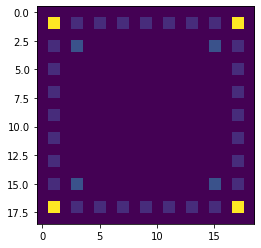

In [327]:
# check the plot with imshow

plt.figure()
plt.imshow(final_grid)

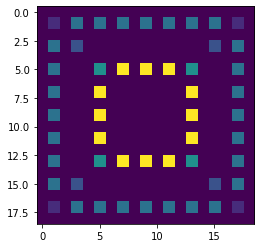

In [328]:
plt.figure()
plt.imshow(test_output[0])

In [320]:
import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 8, in __main__.common_color
Failed example:
    print (n,a,b)
Expected:
    1 [1] [array([[ 1, 15,  1],
       [ 3, 17,  1]])]
Got:
    1 [1] [array([[ 1, 15,  1],
           [ 3, 17,  1]])]
**********************************************************************
1 items had failures:
   1 of   3 in __main__.common_color
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=6)

# Generate tests and check all.

In [ ]:
test_me = np.array([[1,2,0], [3,0,0], [0,0,4]]) # make a small array for testing.
rows_cols (test_me)

In [ ]:
get_coords(test_me)

In [ ]:
translate (np.array([2, 5, 8,]), 3, 4)